# Introduction to the project

Being a data and artificial intelligence enthusiast, you’ve recently joined Microsoft Azure in an attempt to help organizations understand the benefits of using cloud storage for analytics and applied machine learning in order to help them eventually unleash the power of artificial intelligence. You’re joining at a great time - a new storage offering [Azure Synapse](https://azure.microsoft.com/en-us/services/synapse-analytics/) has been launched that helps customers consolidate their analytics workloads into a single data lake to further generate powerful insights, train their models for multiple AI scenarios (autonomous car, genomics, intelligent surveillance to name a few) and distribute this data to remote locations for local consumption. It’s the next “big thing” and a multi-billion dollar opportunity for your team and your company. Knowing the benefits of the product and having a strong team and ecosystem by your side as a new member of the Microsoft Azure team, you’re eager to let the world know about it and bring its growth to new heights. Your immediate objectives are:

- Review the data about product usage, existing customers’ industries, and verticals as well as geography.
- Identify prospective acquisition funnels and corresponding growth loops.
- Identify opportunities for product improvement.
- Define your high-level game plan and build the proposed acquisition strategy that will map into the overall growth strategy of your product and platform.

Here some further information about [Azure Synapse Analytics (formerly SQL DW) architecture](https://docs.microsoft.com/en-us/azure/synapse-analytics/sql-data-warehouse/massively-parallel-processing-mpp-architecture)

**Our product is a new disruptive technology in the Big Data space.**

- Total revenue to date is approximately $4M.
- Total number of purchases is 700.
- Total number of customers is 200.
- Product has been on the market for 4 months.
- Your average customer lifespan is 20 years.

Check this [video](https://youtu.be/hu1N8uz65Vk) presenting a similar situation while [here](https://docs.microsoft.com/en-us/azure/synapse-analytics/overview-what-is) you have a brief explanation about what Azure Synapse is all about and [here](azure.microsoft.com/en-gb/overview/what-is-azure/) some performance results. Regions and Availability Zones in Azure can be found [here](https://docs.microsoft.com/en-us/azure/availability-zones/az-overview).

In [1]:
# import necessary libralies
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
%matplotlib inline

In [2]:
# check names of 
os.listdir()

['.ipynb_checkpoints',
 'boxplots.png',
 'common_requirement_per_geography.png',
 'common_requirement_per_Industry.png',
 'Current_Terabyte_Demand_Industry.png',
 'Current_Terabyte_Demand_Region.png',
 'Customers.csv',
 'Customers.xlsx',
 'Demand_forecast.csv',
 'distribution.png',
 'first_feedback.png',
 'geographies.png',
 'growth_azure_synapse.html',
 'growth_azure_synapse.ipynb',
 'industries.png',
 'loops.jpg',
 'Pain_points_and_feedback.csv',
 'peer_feedback_udacity.png',
 'Product_business_review.csv',
 'second_feedback.png',
 'submission',
 'third_feedback.png',
 'TM_WORLD_BORDERS-0.3',
 'TM_WORLD_BORDERS_SIMPL-0.3',
 'to_avoid_to_explore_so_12_mo.png',
 'to_avoid_to_explore_so_far.png',
 'Twelve_Month_Terabyte_Demand_Industry.png',
 'Twelve_Month_Terabyte_Demand_Region.png',
 'unleashing_storage_growth.docx',
 'unleashing_storage_growth.pdf',
 'World_Regions.lpk',
 '~$leashing_storage_growth.docx']

### Product usage, existing customers’ industries, and verticals as well as geography
>Information in the customer's table
- Customer name
- Geo region
- Current usage (TB)
- Industry/vertical
- Common requirement
- Internal/External

In [3]:
# import customer data 
customers = pd.read_csv('Customers.csv')

In [4]:
# rename features for better data elaboration
customers.rename(columns = {'Customer name': 'customer_name', 'Geo region': 'geo_region', 'Current usage (TB)':'current_usage_TB',
       'Industry/vertical':'industry', 'Common requirement': 'common_requirement', 'Internal/External': 'internal_external'}, inplace = True)

### Twelve Month Forecast - Total addressable market in Terabyte
>Typical ramp	
- 0-6 months	70%	Amount of data ingested to storage over the first 2 quarters (6 months)
- 6-9 months	20%	Amount of data ingested to storage in the 3rd quarter
- 9-12 months	10%	Amount of data ingested in the 4th quarter

In [5]:
# import forecast data 
demand = pd.read_csv('Demand_forecast.csv')

In [6]:
# rename features for better data elaboration
demand.rename(columns = {'Customer name': 'customer_name', 'Geo region': 'geo_region',
 'Total addressable market - 12 mo (TB)': 'total_12mo_mkt_TB', 
 'Unnamed: 3':'u_3','Unnamed: 4':'u_4', 'Unnamed: 5':'u_5', 
 'Unnamed: 6': 'u_6', 'Unnamed: 7': 'u_7' }, inplace = True)

In [7]:
# check customers info
customers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 209 entries, 0 to 208
Data columns (total 6 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   customer_name       209 non-null    object 
 1   geo_region          209 non-null    object 
 2   current_usage_TB    209 non-null    float64
 3   industry            209 non-null    object 
 4   common_requirement  209 non-null    object 
 5   internal_external   209 non-null    object 
dtypes: float64(1), object(5)
memory usage: 9.9+ KB


In [8]:
# check demand info
demand.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 209 entries, 0 to 208
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   customer_name      209 non-null    object 
 1   geo_region         209 non-null    object 
 2   total_12mo_mkt_TB  209 non-null    float64
 3   u_3                0 non-null      float64
 4   u_4                1 non-null      object 
 5   u_5                3 non-null      object 
 6   u_6                3 non-null      object 
 7   u_7                3 non-null      object 
dtypes: float64(2), object(6)
memory usage: 13.2+ KB


In [9]:
# drop columns that is purely informative for the table
demand.drop(['u_3', 'u_4', 'u_5', 'u_6', 'u_7'], axis = 1, inplace = True)

### Join customers and demand tables on customer_name, then join feedback table

In [10]:
# join customers and demand on index
cus_data = customers.join(demand, lsuffix='_customers', rsuffix='_demand')

In [11]:
# geo_region_customers hold the same value, rename one to keep, drop the other
cus_data.rename(columns = {'geo_region_customers': 'geo_region'}, inplace = True)
cus_data.drop('geo_region_demand', axis = 1, inplace = True)

In [12]:
# read feedback table
feedback = pd.read_csv('Pain_points_and_feedback.csv')

In [13]:
# rename feedback table columns for better data elaboration
feedback.rename(columns = {'Customer name': 'customer_name', 
                           'Common feedback/painpoint 1': 'feed_1', 
                           'Common feedback/painpoint 2': 'feed_2', 
                           'Common feedback/painpoint 3': 'feed_3' }, inplace = True)

In [14]:
# join feedback data
data = cus_data.join(feedback)

$Calculate$ **Current Revenue**, **Prospect Revenue**, based on TB usage (not GB) 

In [30]:
review = pd.read_csv('Product_business_review.csv')
review

,Preview date,7/23/2019
0,General availability date,9/21/2019
1,Price at preview,$0.015/GB
2,Price at GA,$0.03/GB
3,Regional availability,"US West, Europe West, UK South, Asia East, Ind..."
4,Physical capacity per region,~40000 TB
5,Sellable capacity per region,~25% of physical
6,Gross margin at listed price,~33%
7,Overall portfolio gross margin,~65%
8,Overall protfolio sellable capacity ratio,~80% of physical
9,Competition gross margin,~70%


In [24]:
# calculate actual revenue per customer
data['current_revenue'] = data.loc[:, 'current_usage_TB']*30 # 0.03USD/GB, 30USD/TB for actual revenue

In [25]:
# calculate prospect revenue in twelve months per custome 
data['prospect_revenue'] = data.loc[:, 'total_12mo_mkt_TB']*30 # 0.03USD/GB, 30USD/TB forecast revenue in a year

In [26]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 209 entries, 0 to 208
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   customer_name_customers  209 non-null    object 
 1   geo_region               209 non-null    object 
 2   current_usage_TB         209 non-null    float64
 3   industry                 209 non-null    object 
 4   common_requirement       209 non-null    object 
 5   internal_external        209 non-null    object 
 6   customer_name_demand     209 non-null    object 
 7   total_12mo_mkt_TB        209 non-null    float64
 8   customer_name            102 non-null    object 
 9   feed_1                   102 non-null    object 
 10  feed_2                   102 non-null    object 
 11  feed_3                   102 non-null    object 
 12  current_revenue          209 non-null    float64
 13  prospect_revenue         209 non-null    float64
dtypes: float64(4), object(10)


In [27]:
data.describe()

,current_usage_TB,total_12mo_mkt_TB,current_revenue,prospect_revenue
count,209.000000,209.000000,209.000000,209.000000
mean,0.956938,191.387560,28.708134,5741.626794
std,0.566606,109.191364,16.998178,3275.740915
min,0.020607,6.789910,0.618199,203.697294
25%,0.466866,97.912583,14.005987,2937.377485
50%,0.911269,196.200639,27.338076,5886.019182
75%,1.435944,286.706760,43.078320,8601.202800
max,1.931608,388.493976,57.948252,11654.819283


In [23]:
# calculate total current revenue for one month
data.current_revenue.sum()

5999.999999886

In [31]:
# calculate twelve month revenue
data.prospect_revenue.sum()

1200000.0000112199

In [32]:
# calculate total current_usage_TB
data.current_usage_TB.sum()

199.9999999962

In [35]:
# calculate total total_12mo_mkt_TB
data.total_12mo_mkt_TB.sum()

200000.00000186998

1. Revenue is 6 000 USD per month. **6 000 USD * 4 (quartters) = 24 000** over 4 months
(0.03$/GB * 200TB (current usage in TB) 1000(to rescale for GB) * 4 (months)

2. We know that our gross margin at listed price is around 33%
Price at GA is $0.03/GB
Total capacity is 5,00,00,000 GB
So 100% - 33% = 67% -> 0.67
(0.03USD) (0.67) = 0.0201USD
Then: (5,00,00,000 GB) (0.0201 USD) =10,05,000USD

So our Gross Margin is 10,05,000USD

**Some data points and assumptions we’d need before getting started:**

- Number of accounts translates to the number of purchases.
- Average customer lifespan may be shorter since this product is new so we can assume it to be in the range of ~10 years.
- 3x multiplier since the product has been live for 4 months and we’d want CLTV over 1 year.

Overall approach to calculating CLTV:

1. Calculate average purchase value: 4M USD/ 700 Initial purchases  = 5,714.3 USD
2. Calculate average purchase frequency rate: 700/200 (unique customers) = 3.5
3. Calculate customer value: 3.5 *  5,714.3 USD = 20,000.1 USD
4. Calculate average customer lifespan: 10 years CLTV = 3 X 20,000.1 USD X 10 years = 60,0001.5 USD

And a quick sanity check - the number doesn’t look too big given this is a big data solution, so there will be some data stored, analytics performed on top, and it can be a resource intense workload. Another way to approach this is to do a quick research on how much $ organizations spend today on their big data & analytics workloads per year. Your calculations should be in the ballpark. I’d recommend always doing a sanity check!

### Split Data horizontaly
>`to_avoid`: Companies that DID NOT provide feedback. We assume those companies and the caracteristics they represent cannot get into a possible Growth Loop for the moment as we are more uncertain if we managed to have them in our funnel. We can't read their minds about what they may want, and even if we did this is extremely time and energy consuming. Better focusing on the ones that did give feedback and flag 'to_avoid' companies as 'hesitant' companies for our product and likely to abandon us. We have little data to further explore them with regards to our product. Before deepening our engagement, we'd better create a strong network so that they understood upon our performance we are the best in the market and they will be having a prosperous future if they partnered with us.

>`to explore`: Companies that did provide feedback. It does worth payng attention to their feedback as we should deepen our knowledge to create not only a growth loop for customer acquisition upon them, but also a hook model to garantee their rentention. 

In [36]:
# split data to the ones that have provided feedback and the ones that did not
to_avoid = data[data.feed_1.isnull()]
to_explore = data[data.feed_1.notnull()]
to_avoid.reset_index(inplace = True)
to_explore.reset_index(inplace = True)

In [37]:
# create a funcion that transforms features to categorical variables
def to_category(df, feature):
    '''takes a dataframe and a specific feature and transforms that feature to a categorical variable'''
    cat_obj = pd.api.types.CategoricalDtype(ordered = True, categories = list(df[feature].unique()))
    df.loc[:,feature] = df[feature].astype(cat_obj)

In [39]:
# tranform objects to categories for the needs of exploratory data analysis with visuals 
for col in to_explore.columns:
    if to_explore[col].dtypes == 'O':
        to_category(to_explore, col)

In [40]:
to_explore.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 102 entries, 0 to 101
Data columns (total 15 columns):
 #   Column                   Non-Null Count  Dtype   
---  ------                   --------------  -----   
 0   index                    102 non-null    int64   
 1   customer_name_customers  102 non-null    category
 2   geo_region               102 non-null    category
 3   current_usage_TB         102 non-null    float64 
 4   industry                 102 non-null    category
 5   common_requirement       102 non-null    category
 6   internal_external        102 non-null    category
 7   customer_name_demand     102 non-null    category
 8   total_12mo_mkt_TB        102 non-null    float64 
 9   customer_name            102 non-null    category
 10  feed_1                   102 non-null    category
 11  feed_2                   102 non-null    category
 12  feed_3                   102 non-null    category
 13  current_revenue          102 non-null    float64 
 14  prospect_r

In [41]:
# replace Null values with zeros for companies that did not give feedback
to_avoid.feed_1.fillna(0)
to_avoid.feed_2.fillna(0)
to_avoid.feed_3.fillna(0);

### Exploratory Data Analysis with Visuals

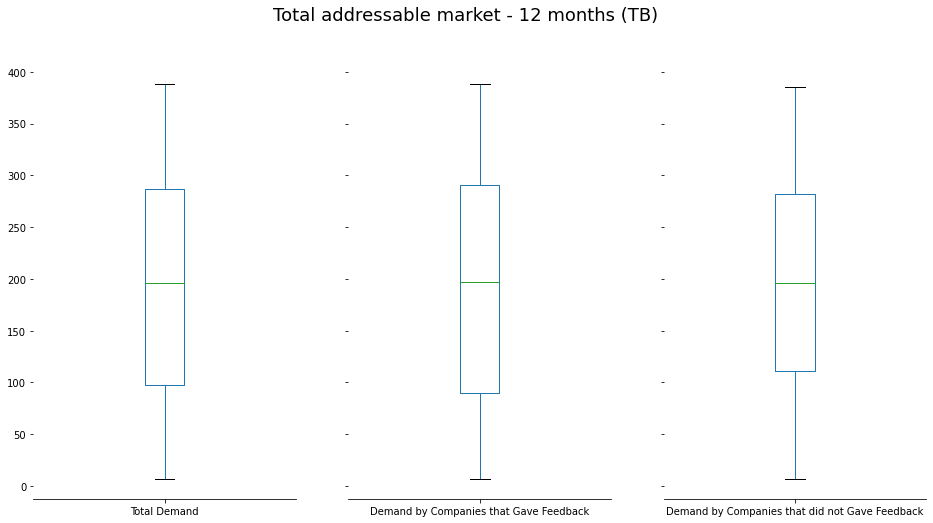

In [42]:
# Visualize total addressable market
f, axes = plt.subplots(1, 3, figsize=(16, 8), sharey=True)
sns.despine(left=True)
data.total_12mo_mkt_TB.plot(kind = 'box', ax=axes[0], label = 'Total Demand')
to_explore.total_12mo_mkt_TB.plot(kind = 'box', ax=axes[1], label = 'Demand by Companies that Gave Feedback')
to_avoid.total_12mo_mkt_TB.plot(kind = 'box', ax=axes[2], label = 'Demand by Companies that did not Gave Feedback')
plt.suptitle('Total addressable market - 12 months (TB)', fontsize = 18)
plt.ylabel('Terabytes');

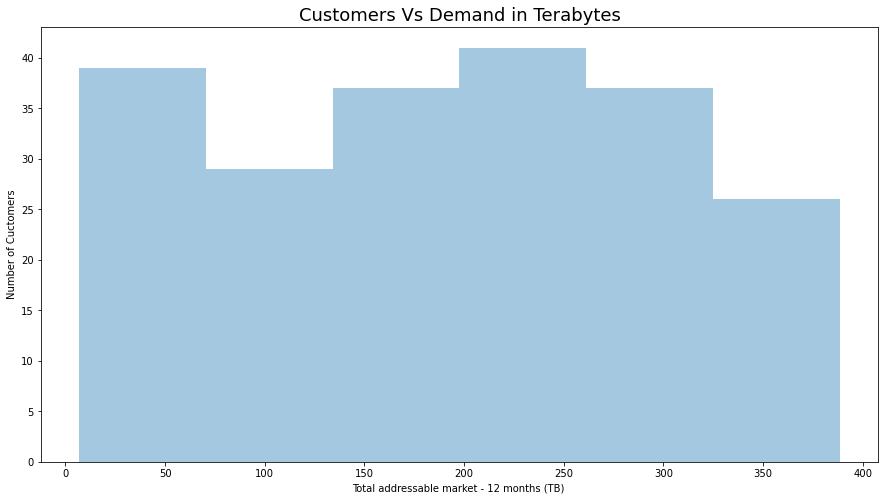

In [43]:
# demsnd customer distribution in a year
fig, ax = plt.subplots(figsize= (15,8))
sns.distplot(data.total_12mo_mkt_TB, kde = False)
plt.xlabel('Total addressable market - 12 months (TB) ')
plt.ylabel('Number of Cuctomers')
plt.title('Customers Vs Demand in Terabytes', fontsize = 18);

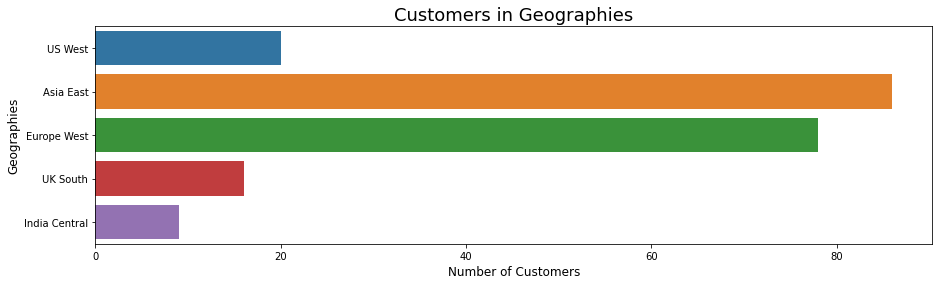

In [83]:
# Geographies presence
fig, ax = plt.subplots(figsize= (15,4))
sns.countplot(data = data, y = 'geo_region')
plt.ylabel('Geographies', fontsize = 12)
plt.xlabel('Number of Customers', fontsize = 12)
plt.title('Customers in Geographies', fontsize = 18)
plt.savefig('geographies.png');

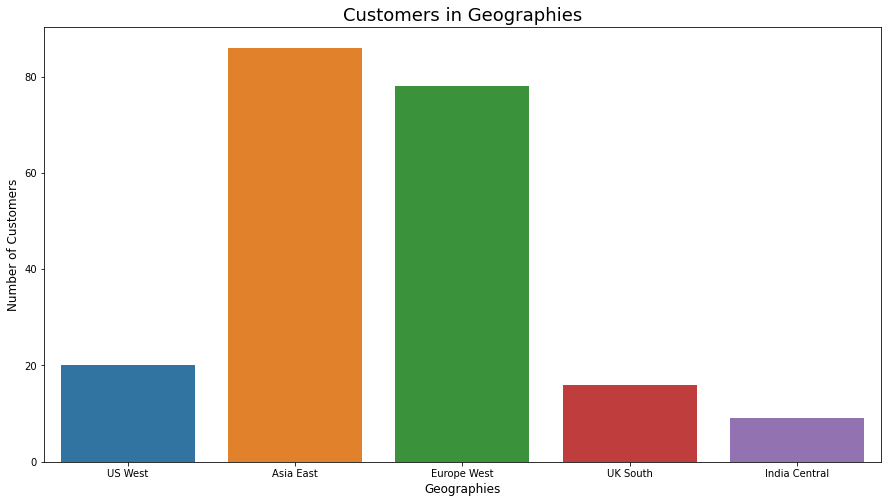

In [86]:
fig, ax = plt.subplots(figsize= (15,8))
sns.countplot(data = data, x = 'geo_region')
plt.xlabel('Geographies', fontsize = 12)
plt.ylabel('Number of Customers', fontsize = 12)
plt.title('Customers in Geographies', fontsize = 18)
plt.savefig('geographies_vertical.png');

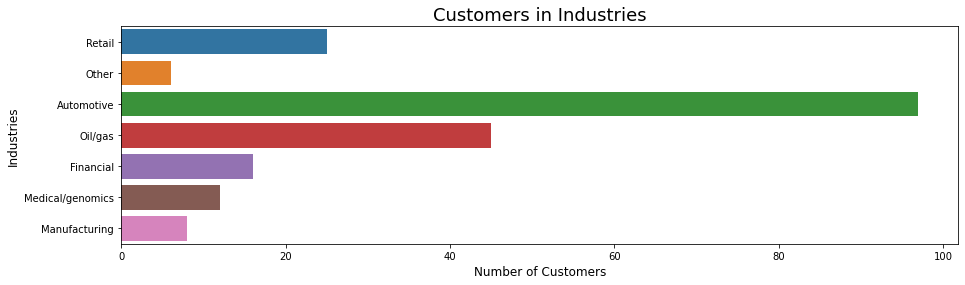

In [84]:
# Geographies presence
fig, ax = plt.subplots(figsize= (15,4))
sns.countplot(data = data, y = 'industry')
plt.ylabel('Industries', fontsize = 12)
plt.xlabel('Number of Customers', fontsize = 12)
plt.title('Customers in Industries', fontsize = 18)
plt.savefig('industries.png');

In [46]:
data.columns

Index(['customer_name_customers', 'geo_region', 'current_usage_TB', 'industry',
       'common_requirement', 'internal_external', 'customer_name_demand',
       'total_12mo_mkt_TB', 'customer_name', 'feed_1', 'feed_2', 'feed_3',
       'current_revenue', 'prospect_revenue'],
      dtype='object')

In [47]:
def general_violin(df, cat_feat, num_feat, x_label, y_label, violin_title):
    "Describe general data with the use of violin plots"
    f, axes = plt.subplots(1, 1, figsize=(16, 4), sharex=True)
    sns.despine(left=True)
    sns.violinplot(data = df, x = cat_feat, y = num_feat)
    plt.xlabel(x_label, fontsize = 12)
    plt.ylabel(y_label, fontsize = 12)
    plt.title(violin_title, fontsize = 18);

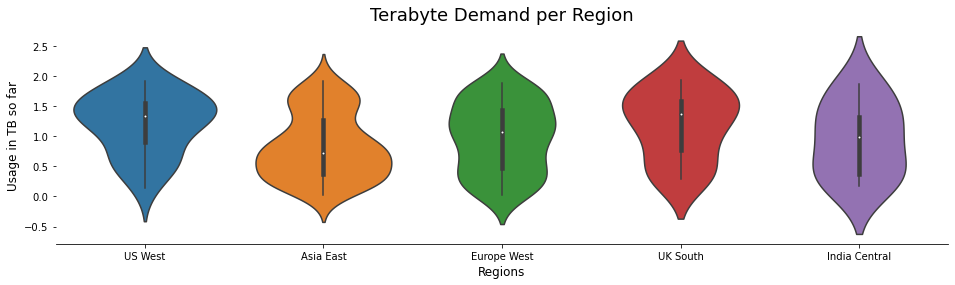

In [48]:
general_violin(data, 'geo_region', 'current_usage_TB', 'Regions', 'Usage in TB so far', 'Terabyte Demand per Region' )
plt.savefig('Current_Terabyte_Demand_Region.png');

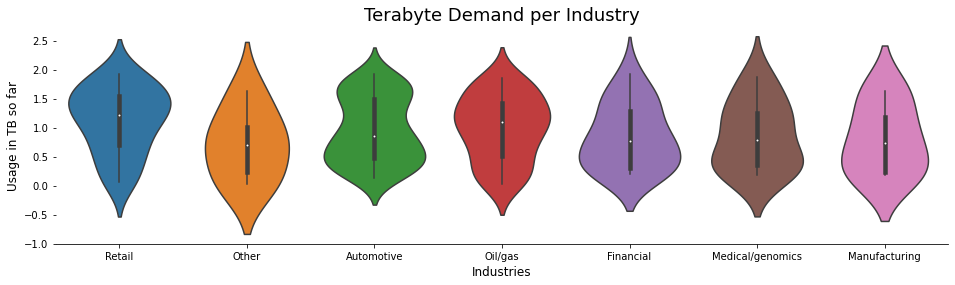

In [49]:
general_violin(data, 'industry', 'current_usage_TB', 'Industries', 'Usage in TB so far', 'Terabyte Demand per Industry' )
plt.savefig('Current_Terabyte_Demand_Industry.png');

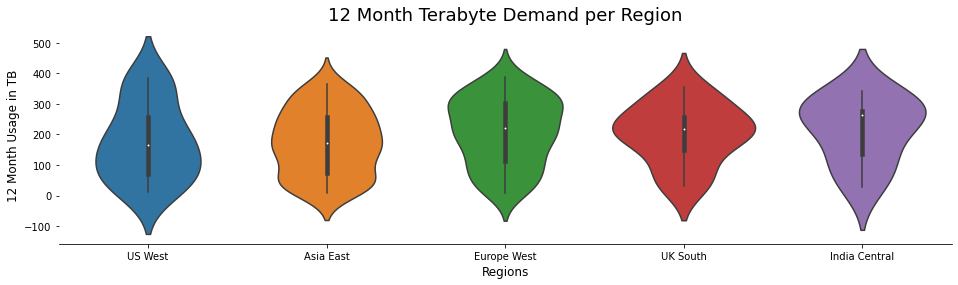

In [50]:
general_violin(data, 'geo_region', 'total_12mo_mkt_TB', 'Regions', '12 Month Usage in TB', '12 Month Terabyte Demand per Region' )
plt.savefig('Twelve_Month_Terabyte_Demand_Region.png');

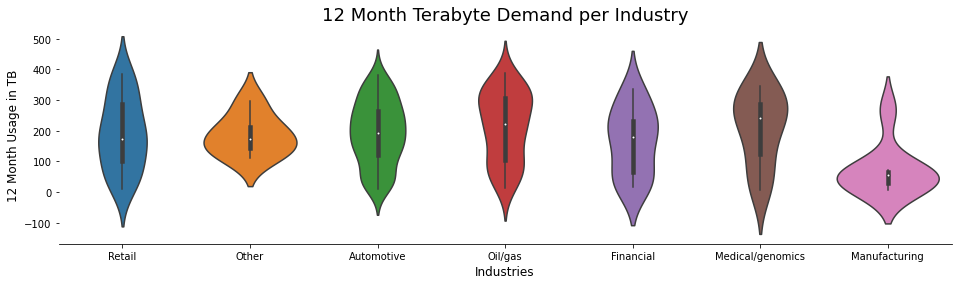

In [51]:
general_violin(data, 'industry', 'total_12mo_mkt_TB', 'Industries', '12 Month Usage in TB', '12 Month Terabyte Demand per Industry' )
plt.savefig('Twelve_Month_Terabyte_Demand_Industry.png');

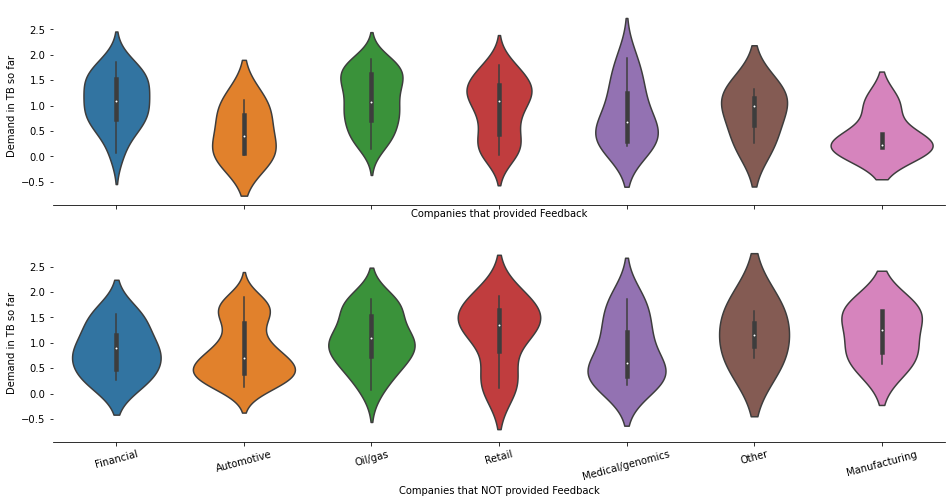

In [52]:
# Set up the matplotlib figure
f, axes = plt.subplots(2, 1, figsize=(16, 8), sharex=True, sharey=True)
sns.despine(left=True)
sns.violinplot(data = to_explore, x = 'industry', y = 'current_usage_TB', ax=axes[0])
sns.violinplot(data = to_avoid, x = 'industry', y = 'current_usage_TB', ax=axes[1])
axes[0].set_xlabel("Companies that provided Feedback")
axes[1].set_xlabel("Companies that NOT provided Feedback")
axes[0].set_ylabel("Demand in TB so far")
axes[1].set_ylabel("Demand in TB so far")
plt.xticks(rotation = 15);

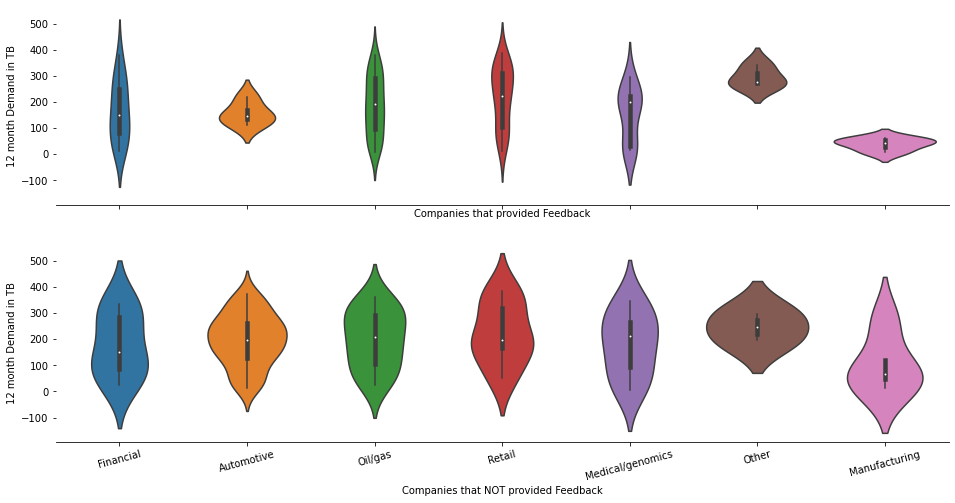

In [53]:
# Set up the matplotlib figure
f, axes = plt.subplots(2, 1, figsize=(16, 8), sharex=True, sharey=True)
sns.despine(left=True)
sns.violinplot(data = to_explore, x = 'industry', y = 'total_12mo_mkt_TB', ax=axes[0])
sns.violinplot(data = to_avoid, x = 'industry', y = 'total_12mo_mkt_TB', ax=axes[1])
axes[0].set_xlabel("Companies that provided Feedback")
axes[1].set_xlabel("Companies that NOT provided Feedback")
axes[0].set_ylabel("12 month Demand in TB")
axes[1].set_ylabel("12 month Demand in TB")
plt.xticks(rotation = 15);

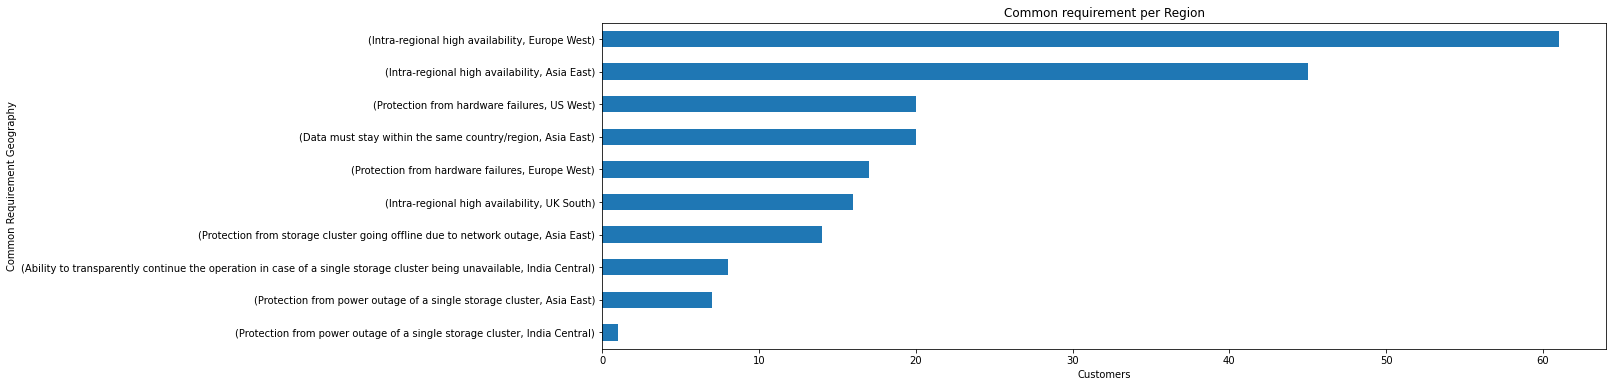

In [75]:
# most important requirement per region
data.groupby(['common_requirement','geo_region'])['geo_region'].count().sort_values().plot(kind = 'barh', figsize = (18, 6), title = 'Common requirement per Region')
plt.xlabel('Customers')
plt.ylabel('Common Requirement Geography')
plt.savefig('common_requirement_per_geography.png');

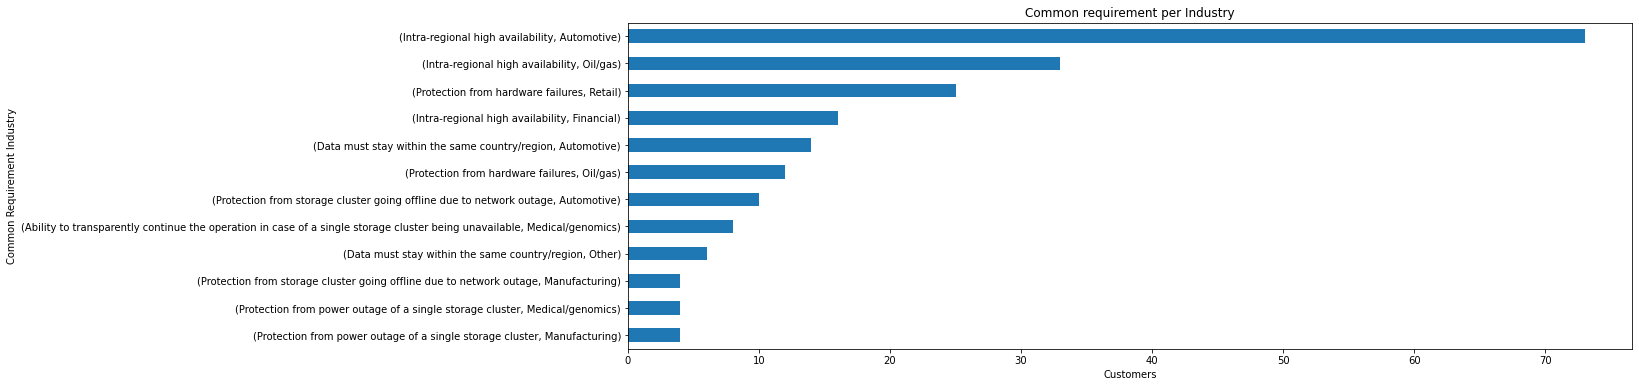

In [76]:
# most important requirement per industry
data.groupby(['common_requirement','industry'])['industry'].count().sort_values().plot(kind = 'barh', figsize = (18, 6), title = 'Common requirement per Industry')
plt.xlabel('Customers')
plt.ylabel('Common Requirement Industry')
plt.savefig('common_requirement_per_Industry.png');

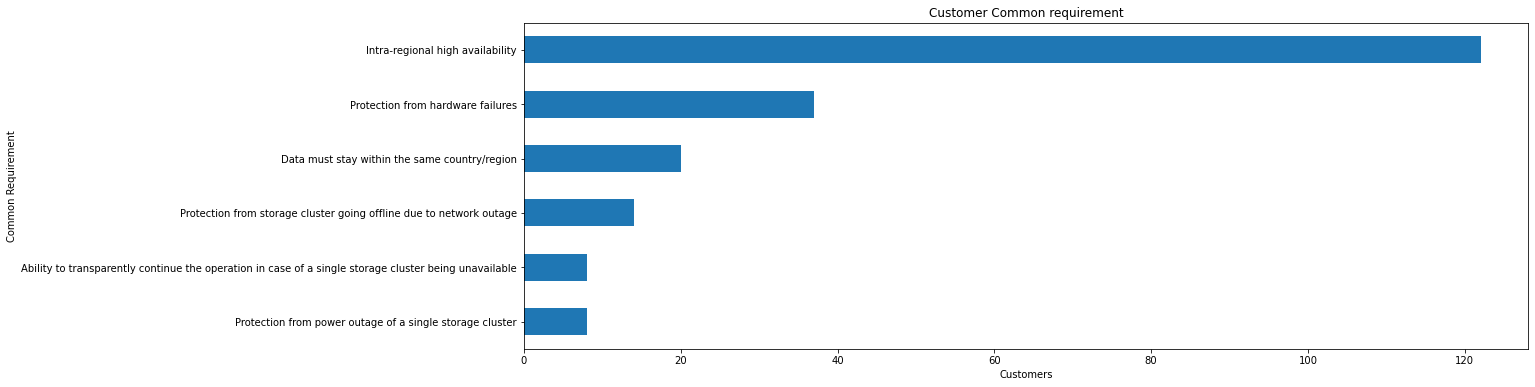

In [77]:
# customer common requirement 
data.common_requirement.value_counts().sort_values().plot(kind = 'barh', figsize = (18, 6), title = 'Customer Common requirement');
plt.xlabel('Customers')
plt.ylabel('Common Requirement')
plt.savefig('common_requirement.png');

In [46]:
review = pd.read_csv('Product_business_review.csv')

In [47]:
review

,Preview date,7/23/2019
0,General availability date,9/21/2019
1,Price at preview,$0.015/GB
2,Price at GA,$0.03/GB
3,Regional availability,"US West, Europe West, UK South, Asia East, Ind..."
4,Physical capacity per region,~40000 TB
5,Sellable capacity per region,~25% of physical
6,Gross margin at listed price,~33%
7,Overall portfolio gross margin,~65%
8,Overall protfolio sellable capacity ratio,~80% of physical
9,Competition gross margin,~70%


In [48]:
# Total available capacity (TB)*
sellable_capacity_per_region = 40000*0.25
sellable_capacity_per_region


10000.0

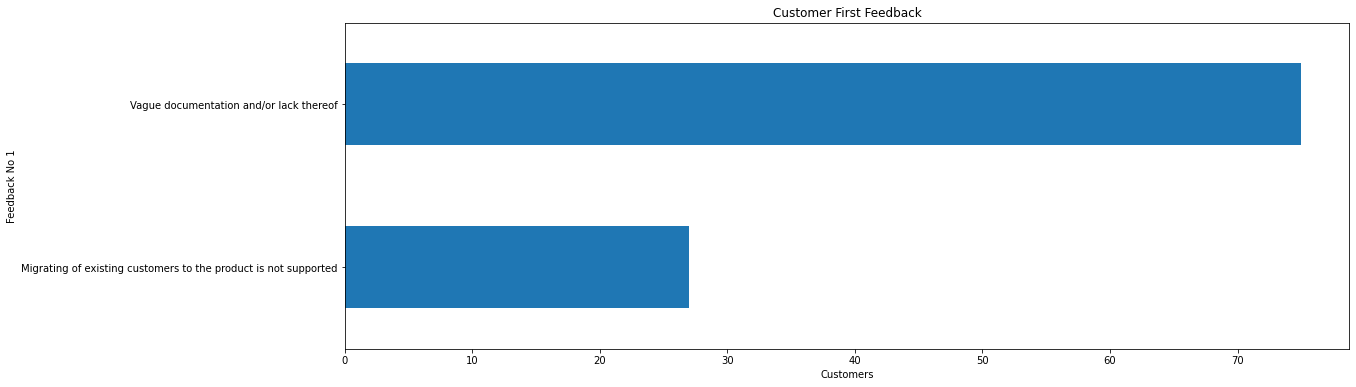

In [78]:
# customer first feedback 
to_explore.feed_1.value_counts().sort_values().plot(kind = 'barh', figsize = (18, 6), title = 'Customer First Feedback')
plt.xlabel('Customers')
plt.ylabel('Feedback No 1')
plt.savefig('feed_1.png');

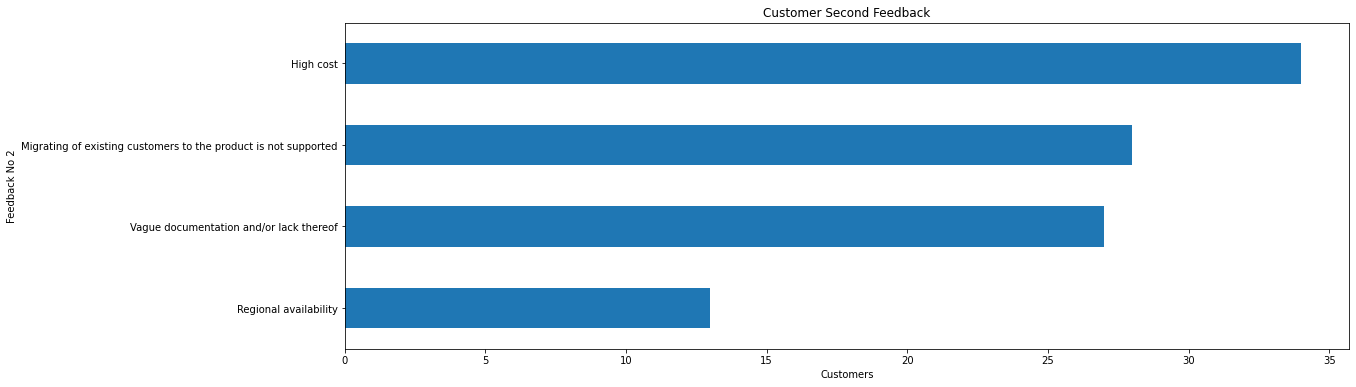

In [79]:
# customer second feedback 
to_explore.feed_2.value_counts().sort_values().plot(kind = 'barh', figsize = (18, 6), title = 'Customer Second Feedback')
plt.xlabel('Customers')
plt.ylabel('Feedback No 2')
plt.savefig('feed_2.png');

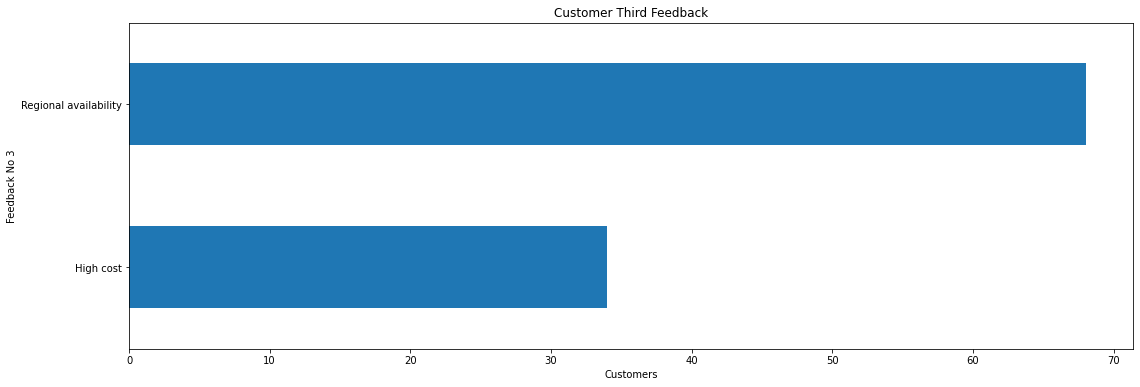

In [80]:
# customer third feedback 
to_explore.feed_3.value_counts().sort_values().plot(kind = 'barh', figsize = (18, 6), title = 'Customer Third Feedback')
plt.xlabel('Customers')
plt.ylabel('Feedback No 3')
plt.savefig('feed_3.png');

In [52]:
data.industry.value_counts()

Automotive          97
Oil/gas             45
Retail              25
Financial           16
Medical/genomics    12
Manufacturing        8
Other                6
Name: industry, dtype: int64

In [53]:
data.common_requirement.value_counts()

Intra-regional high availability                                                                         122
Protection from hardware failures                                                                         37
Data must stay within the same country/region                                                             20
Protection from storage cluster going offline due to network outage                                       14
Ability to transparently continue the operation in case of a single storage cluster being unavailable      8
Protection from power outage of a single storage cluster                                                   8
Name: common_requirement, dtype: int64

In [54]:
to_explore.feed_2.value_counts()

High cost                                                          34
Migrating of existing customers to the product is not supported    28
Vague documentation and/or lack thereof                            27
Regional availability                                              13
Name: feed_2, dtype: int64

In [57]:
data.geo_region.value_counts()

Asia East        86
Europe West      78
US West          20
UK South         16
India Central     9
Name: geo_region, dtype: int64

In [56]:
data.columns

Index(['customer_name_customers', 'geo_region', 'current_usage_TB', 'industry',
       'common_requirement', 'internal_external', 'customer_name_demand',
       'total_12mo_mkt_TB', 'customer_name', 'feed_1', 'feed_2', 'feed_3',
       'current_revenue', 'prospect_revenue'],
      dtype='object')